<a href="https://colab.research.google.com/github/babupallam/Machine-Learning-ML-05--Model-Evaluation-and-Performace-Testing/blob/main/02_Evaluation_Metrics_for_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metrics for Classification Models


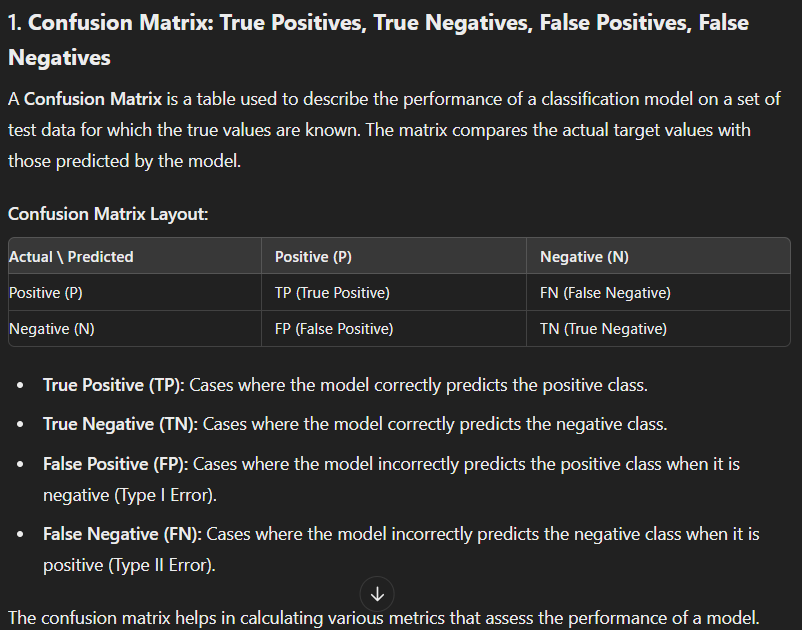

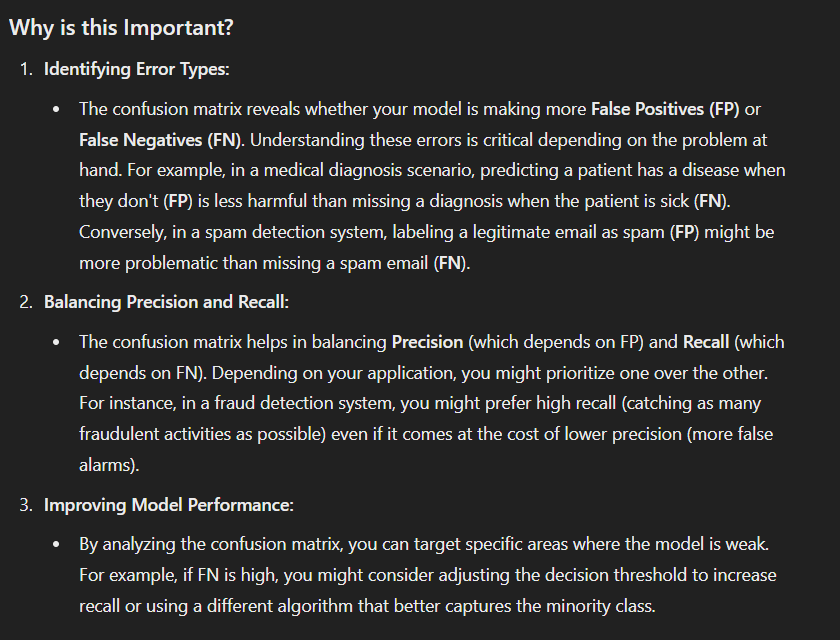

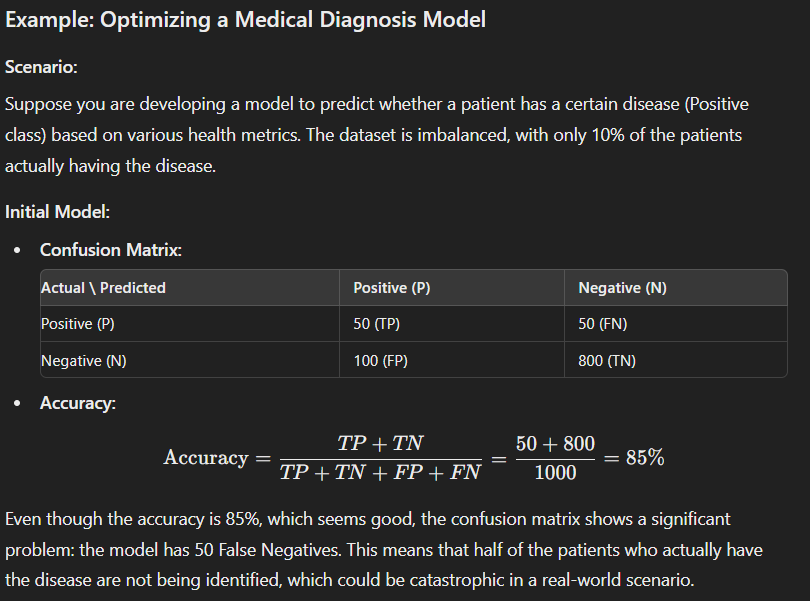

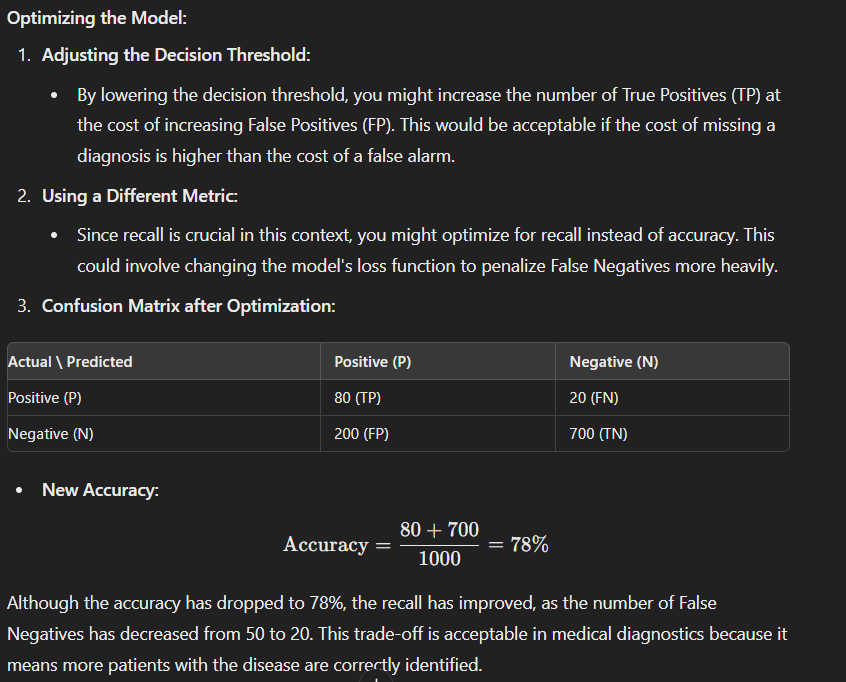



---



---



---



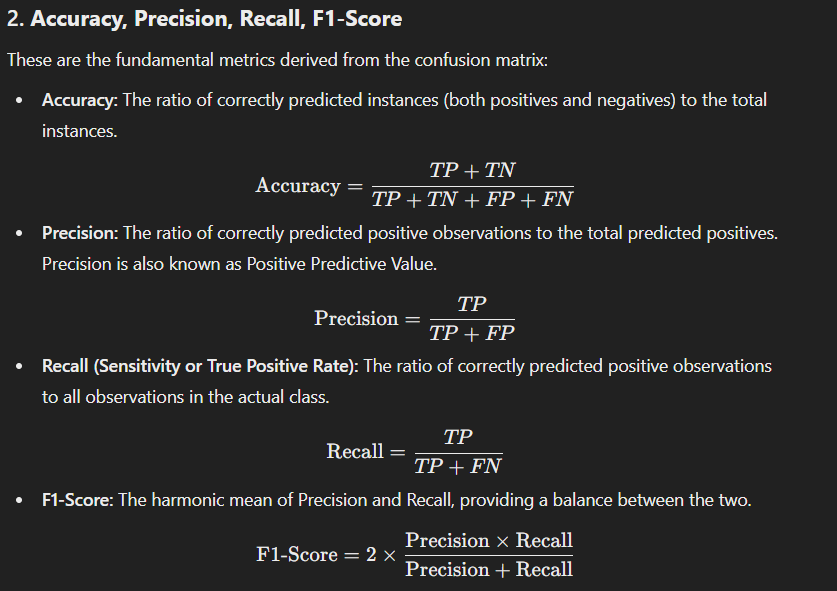


#### Why These Metrics Matter

Section 2, which covers **Accuracy, Precision, Recall, and F1-Score**, is crucial in optimizing machine learning models, especially in classification tasks. Each metric provides different insights into the model's performance, and depending on the problem at hand, optimizing for the right metric can significantly impact the effectiveness of the model.

1. **Accuracy** is useful when the classes in your dataset are balanced and when it’s equally important to correctly classify both classes. However, it can be misleading in imbalanced datasets.

2. **Precision** is important in situations where the cost of a false positive is high. For example, in email spam detection, marking a legitimate email as spam (false positive) can result in important communications being missed. Therefore, you might want to maximize precision.

3. **Recall** is crucial when the cost of a false negative is high. For example, in disease detection (like cancer screening), missing a positive case (false negative) can have severe consequences. Hence, you would aim to maximize recall.

4. **F1-Score** is important when you need a balance between precision and recall, especially in cases where the dataset is imbalanced. It is particularly useful when you cannot favor precision over recall or vice versa.

#### Example: Spam Email Detection

Let's consider a spam email detection system where an email can be classified as either "Spam" or "Not Spam." Suppose we have the following scenarios:

1. **Balanced Dataset:**
   - **Accuracy** might be the preferred metric since we have an equal number of spam and non-spam emails. A high accuracy would indicate that the model is correctly identifying both spam and non-spam emails.

2. **Imbalanced Dataset (90% Non-Spam, 10% Spam):**
   - **Accuracy** could be misleading here. Even if the model predicts every email as "Not Spam," it would still achieve 90% accuracy, which is not useful since the model fails to detect any spam.
   - **Precision** would be critical if marking an email as spam wrongly (false positive) could lead to user dissatisfaction. Imagine an important email being classified as spam—this could be highly detrimental.
   - **Recall** becomes more important if the primary concern is ensuring that spam emails are caught. If the model misses a spam email (false negative), the consequences could involve exposing the user to potential phishing attacks.

3. **F1-Score Optimization:**
   - If we want a balanced approach where we need to consider both spam and non-spam emails equally and cannot tolerate too many false positives or false negatives, **F1-Score** would be the best metric to optimize. It provides a single measure that balances both concerns.

#### Practical Implications in Model Optimization

1. **Tuning Thresholds:**
   - By understanding precision and recall, we can tune the decision threshold of the model to either increase precision or recall based on what is more critical for the problem.

2. **Model Selection:**
   - Some models might naturally have better precision, while others might excel in recall. Knowing which metric to prioritize helps in selecting the right model.

3. **Cost-sensitive Learning:**
   - In some cases, we can introduce a cost-sensitive approach where false positives and false negatives have different costs, and optimizing precision and recall accordingly can reduce the overall cost.





---

---





---



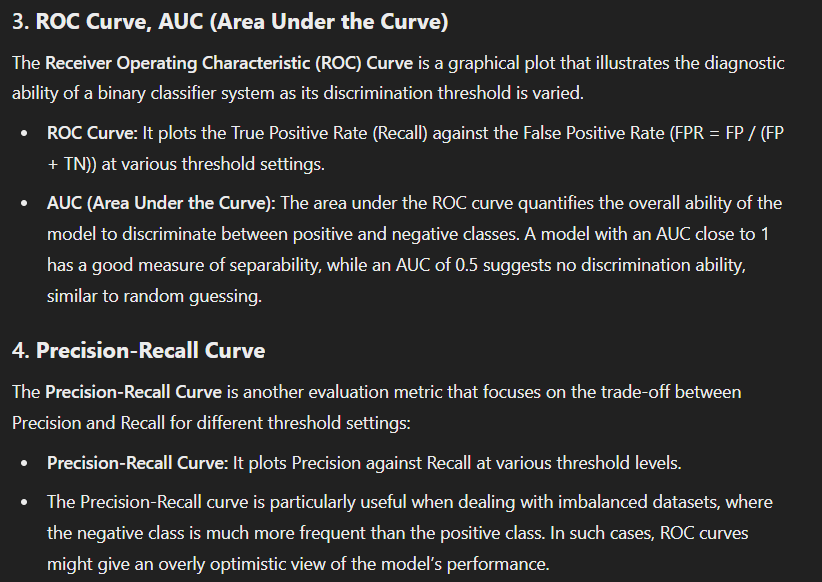


#### 3. **ROC Curve and AUC (Area Under the Curve)**

**ROC Curve** and **AUC** are crucial for evaluating the performance of a binary classifier, especially when the cost of false positives and false negatives is different or when the dataset is imbalanced.

**Why It Matters:**
- **Threshold Tuning:** In many cases, the default threshold of 0.5 might not be optimal for the problem at hand. The ROC curve allows you to assess how the true positive rate (Recall) and false positive rate (FPR) change as you adjust the threshold. This is important because by choosing the right threshold, you can optimize the classifier for different business objectives (e.g., minimizing false positives vs. maximizing true positives).
- **Model Comparison:** The AUC provides a single scalar value to compare the performance of different models. A higher AUC indicates that the model is better at distinguishing between the positive and negative classes across all possible thresholds.

**Example:**
Imagine you're developing a model to detect fraudulent transactions in a banking system. In this scenario, false positives (legitimate transactions flagged as fraud) are costly because they can annoy customers, but false negatives (fraudulent transactions missed) are even more costly because they lead to financial losses.

- **ROC Curve Usage:** By analyzing the ROC curve, you might find that a threshold of 0.3 (instead of the default 0.5) provides a better balance between detecting fraud and minimizing false alarms. This way, you can set the model to catch more fraud while keeping the number of false positives at an acceptable level.
- **AUC Usage:** If you're comparing multiple models (e.g., logistic regression, decision tree, random forest), the model with the highest AUC would generally be preferred, as it indicates a better ability to distinguish between fraudulent and non-fraudulent transactions.

#### 4. **Precision-Recall Curve**

The **Precision-Recall Curve** is particularly important when dealing with imbalanced datasets where one class is much more prevalent than the other.

**Why It Matters:**
- **Handling Imbalanced Data:** In cases of imbalanced datasets, where the positive class (e.g., fraud, disease presence) is rare compared to the negative class, the ROC curve might not provide a complete picture because it could show a high true positive rate simply due to the overwhelming number of true negatives. The Precision-Recall curve, on the other hand, focuses on the positive class and provides insights into the trade-off between precision (the accuracy of positive predictions) and recall.
- **Model Performance in Imbalanced Settings:** A high precision and recall are typically more important in these cases than accuracy because you want to maximize the detection of the positive class without introducing too many false positives.

**Example:**
Consider a model designed to detect rare diseases in medical imaging. The dataset might have 95% healthy cases and only 5% diseased cases.

- **Precision-Recall Curve Usage:** A standard accuracy metric might suggest the model is performing well (e.g., 95% accuracy by always predicting "healthy"), but this would be misleading. By analyzing the Precision-Recall curve, you can better understand how well the model is identifying the rare disease cases. If you have a high recall but low precision, the model catches most disease cases but with many false positives. Depending on the application, you might prioritize high recall to ensure no diseased cases are missed, even at the cost of some false positives.
- **Precision-Recall Trade-off:** If your goal is to reduce the number of unnecessary medical tests triggered by false positives, you might choose a threshold that balances precision and recall, ensuring you maintain a high enough precision to limit false positives without sacrificing too much recall.




---



---



---



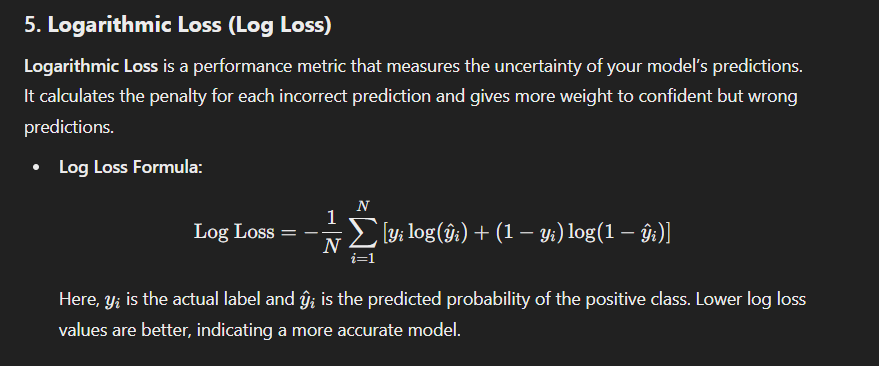

### The Importance of Logarithmic Loss (Log Loss) in Optimizing a Machine Learning Model

**Logarithmic Loss (Log Loss)** is crucial in optimizing a machine learning model, particularly in binary and multiclass classification tasks. It measures the performance of a classification model by evaluating how well the predicted probabilities of the model align with the actual class labels. Unlike accuracy, which only considers whether the prediction is correct or not, Log Loss takes into account the confidence of the predictions. This makes it a more sensitive and informative metric, especially when dealing with probabilistic models.

### Why Log Loss is Important

1. **Penalizes Wrong and Overconfident Predictions:**
   - Log Loss imposes a penalty on the model for making incorrect predictions, especially when the model is highly confident but wrong. For instance, if a model predicts a class with 90% confidence and it turns out to be incorrect, the Log Loss will be higher compared to when the model is less confident in its wrong prediction (say, 60% confidence).

2. **Encourages Probabilistic Calibration:**
   - It encourages models to output well-calibrated probabilities. This means that if a model predicts a class with 70% confidence, in the long run, that class should be correct approximately 70% of the time. This probabilistic calibration is essential for applications where decision-making depends on the certainty of predictions, such as in medical diagnosis or financial forecasting.

3. **Differentiates Between Models with Similar Accuracy:**
   - Two models may have similar accuracy, but their Log Loss values can differ significantly, highlighting which model is better calibrated and more reliable. This helps in choosing the best model, even when accuracy alone might suggest no clear winner.

### Example of Log Loss in Action

#### Scenario:
Consider a medical diagnosis model that predicts whether a patient has a certain disease (positive class) or not (negative class). The model outputs the probability that the patient has the disease.

#### Dataset:
- **Patient 1:** True label = 1 (disease present), Predicted probability = 0.9
- **Patient 2:** True label = 0 (no disease), Predicted probability = 0.7
- **Patient 3:** True label = 1 (disease present), Predicted probability = 0.4
- **Patient 4:** True label = 0 (no disease), Predicted probability = 0.2

#### Calculating Log Loss:
For each patient, Log Loss is calculated as:

- **Patient 1:** \(-[1 \times \log(0.9) + 0 \times \log(1-0.9)] = -\log(0.9) \)
- **Patient 2:** \(-[0 \times \log(0.7) + 1 \times \log(1-0.7)] = -\log(0.3) \)
- **Patient 3:** \(-[1 \times \log(0.4) + 0 \times \log(1-0.4)] = -\log(0.4) \)
- **Patient 4:** \(-[0 \times \log(0.2) + 1 \times \log(1-0.2)] = -\log(0.8) \)

The overall Log Loss is the average of these individual losses.

#### Interpretation:
- **Patient 1:** The model was confident and correct, resulting in a low Log Loss.
- **Patient 2:** The model was confident but incorrect, leading to a high Log Loss.
- **Patient 3:** The model was not confident and incorrect, but because the model wasn’t highly confident, the Log Loss is moderate.
- **Patient 4:** The model was confident and correct, resulting in a low Log Loss.

### Optimizing the Model Using Log Loss

By focusing on minimizing Log Loss, a model learns to make predictions that are not only accurate but also probabilistically calibrated. This is particularly important in the following cases:

1. **Imbalanced Datasets:**
   - In imbalanced datasets, accuracy can be misleading because a model might predict the majority class for most instances and still achieve high accuracy. Log Loss, however, will penalize the model for making incorrect predictions on the minority class with high confidence.

2. **Critical Decision-Making Applications:**
   - In fields like healthcare, finance, or autonomous systems, it’s crucial to have well-calibrated probabilities. For example, in medical diagnosis, predicting the presence of a disease with high confidence when the disease is not present can lead to unnecessary treatments, whereas underconfidence in predictions can delay necessary interventions.

3. **Model Calibration:**
   - Log Loss helps in fine-tuning the model’s output probabilities, ensuring they align more closely with the actual likelihood of events. This is important for subsequent decision-making processes that rely on these probabilities.
